In [14]:
#If you run this yourself, make sure all libraries are installed and the csv file is in the same folder as the notebook
#import libraries
import numpy as np
import pandas as pd
import matplotlib as mlp
from matplotlib import pyplot as plt
mlp.rcParams['figure.dpi'] = 300
import scipy.stats
from sklearn.cluster import KMeans
from sklearn.manifold import TSNE

In [44]:
#import human graded data as pandas df
HG_EM = pd.read_csv("EM.csv") 
HG_QM = pd.read_csv("QM.csv") 
HG_CM = pd.read_csv("CM.csv") 
#import no markscheme data as pandas df
NMS_EM = pd.read_csv("Claude_EM_NMS.csv") 
NMS_QM = pd.read_csv("Claude_QM_NMS.csv")
NMS_CM = pd.read_csv("Claude_CM_NMS.csv")
#import markscheme data as pandas df
MS_EM = pd.read_csv("Claude_EM_MS.csv") 
MS_QM = pd.read_csv("Claude_QM_MS.csv")
MS_CM = pd.read_csv("Claude_CM_MS.csv")

In [45]:
#Examine the human graded data
HG_EM

,Question,Total Marks,M1_Solution 1:,M1_Solution 2:,M1_Solution 3:,M2_Solution 1,M2_Solution 2:,M2_Solution 3:
0,1,8,6,8,5,7,8,7
1,2,5,4,5,5,4,4,4
2,3,14,6,4,4,5,4,5
3,4,11,10,5,9,9,6,9
4,5,11,1,1,1,1,1,1
5,6,5,4,5,4,4,4,4
6,7,6,4,4,4,6,6,4
7,8,6,6,2,4,6,1,4
8,9,15,11,8,8,13,11,11
9,10,7,1,4,3,2,3,3


This seems alright, so we'll leave it as is for now. We don't need to make the initial changes as pandas does that for us. The code should work in either case. Now we need to average the solution grades. 

In [46]:
sol_1_cols = []
sol_2_cols = []
sol_3_cols = []
for column in HG_EM: 
    if 'Solution 1' in column:
        sol_1_cols.append(column)
    if 'Solution 2' in column:
        sol_2_cols.append(column)
    if 'Solution 3' in column:
        sol_3_cols.append(column)
HG = [HG_EM, HG_CM, HG_QM]
for df in HG:
    df['Solution 1'] = df[sol_1_cols].mean(axis = 1)
    df['Solution 2'] = df[sol_2_cols].mean(axis = 1)
    df['Solution 3'] = df[sol_3_cols].mean(axis = 1)
    df['Solution 1 Norm'] = df['Solution 1']/df['Total Marks']
    df['Solution 2 Norm'] = df['Solution 2']/df['Total Marks']
    df['Solution 3 Norm'] = df['Solution 3']/df['Total Marks']
    df['Solution 1 Norm Std'] = df[sol_1_cols].std(axis = 1)/df['Total Marks']
    df['Solution 2 Norm Std'] = df[sol_2_cols].std(axis = 1)/df['Total Marks']
    df['Solution 3 Norm Std'] = df[sol_3_cols].std(axis = 1)/df['Total Marks']
    df.drop(df.columns[[2, 3, 4, 5, 6, 7]], axis=1, inplace=True)    

In [47]:
HG_QM

,Question,Total Marks,Solution 1,Solution 2,Solution 3,Solution 1 Norm,Solution 2 Norm,Solution 3 Norm,Solution 1 Norm Std,Solution 2 Norm Std,Solution 3 Norm Std
0,1,5,4.0,4.5,4.0,0.800000,0.900000,0.800000,0.000000,0.141421,0.000000
1,2,4,4.0,3.5,3.5,1.000000,0.875000,0.875000,0.000000,0.176777,0.176777
2,3,9,9.0,5.5,9.0,1.000000,0.611111,1.000000,0.000000,0.078567,0.000000
3,4,20,15.0,11.0,13.5,0.750000,0.550000,0.675000,0.000000,0.141421,0.176777
4,5,7,5.0,4.0,5.0,0.714286,0.571429,0.714286,0.202031,0.202031,0.202031
5,6,17,10.0,9.5,8.5,0.588235,0.558824,0.500000,0.083189,0.041595,0.041595
6,7,8,6.0,7.5,7.0,0.750000,0.937500,0.875000,0.176777,0.088388,0.176777
7,8,9,8.0,8.5,8.5,0.888889,0.944444,0.944444,0.000000,0.078567,0.078567
8,9,17,11.5,12.5,12.0,0.676471,0.735294,0.705882,0.041595,0.041595,0.000000
9,10,16,5.0,3.0,2.0,0.312500,0.187500,0.125000,0.176777,0.000000,0.088388


In [48]:
sol_1_cols = []
sol_2_cols = []
sol_3_cols = []
for column in HG_EM: 
    if 'Solution 1' in column:
        sol_1_cols.append(column)
    if 'Solution 2' in column:
        sol_2_cols.append(column)
    if 'Solution 3' in column:
        sol_3_cols.append(column)

# Iterate through each DataFrame in the HG list
for i in range(len(HG)):
    df = HG[i]
    df1 = df.copy()
    df2 = df.copy()
    df3 = df.copy()
    
    # Drop the columns not related to each solution
    df1.drop(sol_2_cols + sol_3_cols, axis=1, inplace=True)
    df2.drop(sol_1_cols + sol_3_cols, axis=1, inplace=True)
    df3.drop(sol_1_cols + sol_2_cols, axis=1, inplace=True)
    
    # Rename the columns
    df1.columns = ['Questions', 'Total Marks', 'Marks', 'Norm', 'Norm Std']
    df2.columns = ['Questions', 'Total Marks', 'Marks', 'Norm', 'Norm Std']
    df3.columns = ['Questions', 'Total Marks', 'Marks', 'Norm', 'Norm Std']
    
    # Concatenate the DataFrames
    concatenated_df = pd.concat([df1, df2, df3], ignore_index=True, axis=0)
    
    # Assign the concatenated DataFrame back to the original list
    HG[i] = concatenated_df

In [49]:
HG_EM = HG[0]
HG_CM = HG[1]
HG_QM = HG[2]

In [50]:
HG_EM

,Questions,Total Marks,Marks,Norm,Norm Std
0,1,8,6.5,0.812500,0.088388
1,2,5,4.0,0.800000,0.000000
2,3,14,5.5,0.392857,0.050508
3,4,11,9.5,0.863636,0.064282
4,5,11,1.0,0.090909,0.000000
5,6,5,4.0,0.800000,0.000000
6,7,6,5.0,0.833333,0.235702
7,8,6,6.0,1.000000,0.000000
8,9,15,12.0,0.800000,0.094281
9,10,7,1.5,0.214286,0.101015


In [51]:
#Examine the self graded data
NMS_EM

,Question,Total Marks,Unnamed: 2,Solution 1:,Solution 2:,Solution 3:,Unnamed: 6,Solution 1:.1,Solution 2:.1,Solution 3:.1,...,Solution 2:.2,Solution 3:.2,Unnamed: 14,Solution 1:.3,Solution 2:.3,Solution 3:.3,Unnamed: 18,Solution 1:.4,Solution 2:.4,Solution 3:.4
0,1,8,NaN,8,7,7,NaN,8,7,8,...,7,8,NaN,8,7,7,NaN,8,7,7
1,2,5,NaN,4,3,5,NaN,5,4,5,...,4,5,NaN,5,4,5,NaN,5,4,5
2,3,14,NaN,13,14,12,NaN,13,14,12,...,13,14,NaN,12,13,14,NaN,12,13,14
3,4,11,NaN,10,5,10,NaN,10,7,10,...,6,10,NaN,10,6,10,NaN,11,6,10
4,5,11,NaN,8,9,11,NaN,8,8,11,...,8,11,NaN,9,8,11,NaN,8,9,11
5,6,5,NaN,4,5,5,NaN,5,5,5,...,5,5,NaN,5,5,5,NaN,5,5,5
6,7,6,NaN,6,5,5,NaN,6,5,5,...,5,5,NaN,6,5,5,NaN,6,5,5
7,8,6,NaN,5,3,6,NaN,6,3,5,...,3,5,NaN,5,3,6,NaN,6,3,5
8,9,15,NaN,13,14,15,NaN,15,15,14,...,14,15,NaN,15,15,13,NaN,13,15,14
9,10,7,NaN,4,5,6,NaN,4,5,6,...,5,6,NaN,4,5,6,NaN,4,5,6


Couple things need to be changed. Index vs Question is fine. We need to removed all unnamed 

In [52]:
SG = [NMS_EM, NMS_CM, NMS_QM, MS_EM, MS_CM, MS_QM]

sol_1_cols = []
sol_2_cols = []
sol_3_cols = []

#Seperating Solution1,2,3 columns
for column in NMS_EM: 
    if 'Solution 1' in column:
        sol_1_cols.append(column)
    if 'Solution 2' in column:
        sol_2_cols.append(column)
    if 'Solution 3' in column:
        sol_3_cols.append(column)

for df in SG:
    for column in df:
        if 'Unnamed' in column:
            df.drop(column, axis = 1, inplace = True)
    df['Solution 1'] = df[sol_1_cols].mean(axis = 1)
    df['Solution 2'] = df[sol_2_cols].mean(axis = 1)
    df['Solution 3'] = df[sol_3_cols].mean(axis = 1)
    df['Solution 1 Norm'] = df['Solution 1']/df['Total Marks']
    df['Solution 2 Norm'] = df['Solution 2']/df['Total Marks']
    df['Solution 3 Norm'] = df['Solution 3']/df['Total Marks']
    df['Solution 1 Norm Std'] = df[sol_1_cols].std(axis = 1)/df['Total Marks']
    df['Solution 2 Norm Std'] = df[sol_2_cols].std(axis = 1)/df['Total Marks']
    df['Solution 3 Norm Std'] = df[sol_3_cols].std(axis = 1)/df['Total Marks']
    df.drop(df.columns[[2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14,
       15, 16]], axis=1, inplace=True)

In [53]:
NMS_EM

,Question,Total Marks,Solution 1,Solution 2,Solution 3,Solution 1 Norm,Solution 2 Norm,Solution 3 Norm,Solution 1 Norm Std,Solution 2 Norm Std,Solution 3 Norm Std
0,1,8,8.0,7.0,7.4,1.000000,0.875000,0.925000,0.000000,0.000000,0.068465
1,2,5,4.8,3.8,5.0,0.960000,0.760000,1.000000,0.089443,0.089443,0.000000
2,3,14,12.4,13.4,13.2,0.885714,0.957143,0.942857,0.039123,0.039123,0.078246
3,4,11,10.2,6.0,10.0,0.927273,0.545455,0.909091,0.040656,0.064282,0.000000
4,5,11,8.4,8.4,11.0,0.763636,0.763636,1.000000,0.049793,0.049793,0.000000
5,6,5,4.8,5.0,5.0,0.960000,1.000000,1.000000,0.089443,0.000000,0.000000
6,7,6,6.0,5.0,5.0,1.000000,0.833333,0.833333,0.000000,0.000000,0.000000
7,8,6,5.6,3.0,5.4,0.933333,0.500000,0.900000,0.091287,0.000000,0.091287
8,9,15,13.8,14.6,14.2,0.920000,0.973333,0.946667,0.073030,0.036515,0.055777
9,10,7,4.0,5.0,6.0,0.571429,0.714286,0.857143,0.000000,0.000000,0.000000


In [54]:
sol_1_cols = []
sol_2_cols = []
sol_3_cols = []
for column in NMS_EM: 
    if 'Solution 1' in column:
        sol_1_cols.append(column)
    if 'Solution 2' in column:
        sol_2_cols.append(column)
    if 'Solution 3' in column:
        sol_3_cols.append(column)

# Iterate through each DataFrame in the SG list
for i in range(len(SG)):
    df = SG[i]
    df1 = df.copy()
    df2 = df.copy()
    df3 = df.copy()
    
    # Drop the columns not related to each solution
    df1.drop(sol_2_cols + sol_3_cols, axis=1, inplace=True)
    df2.drop(sol_1_cols + sol_3_cols, axis=1, inplace=True)
    df3.drop(sol_1_cols + sol_2_cols, axis=1, inplace=True)
    
    # Rename the columns
    df1.columns = ['Questions', 'Total Marks', 'Marks', 'Norm', 'Norm Std']
    df2.columns = ['Questions', 'Total Marks', 'Marks', 'Norm', 'Norm Std']
    df3.columns = ['Questions', 'Total Marks', 'Marks', 'Norm', 'Norm Std']
    
    # Concatenate the DataFrames
    concatenated_df = pd.concat([df1, df2, df3], ignore_index=True, axis=0)
    
    # Assign the concatenated DataFrame back to the original list
    SG[i] = concatenated_df

In [55]:
#Assigning names
NMS_EM = SG[0]
NMS_CM = SG[1]
NMS_QM = SG[2]
MS_EM = SG[3]
MS_CM = SG[4]
MS_QM = SG[5] 

In [56]:
NMS_EM

,Questions,Total Marks,Marks,Norm,Norm Std
0,1,8,8.0,1.000000,0.000000
1,2,5,4.8,0.960000,0.089443
2,3,14,12.4,0.885714,0.039123
3,4,11,10.2,0.927273,0.040656
4,5,11,8.4,0.763636,0.049793
5,6,5,4.8,0.960000,0.089443
6,7,6,6.0,1.000000,0.000000
7,8,6,5.6,0.933333,0.091287
8,9,15,13.8,0.920000,0.073030
9,10,7,4.0,0.571429,0.000000


# Regression Markscheme vs No Markscheme

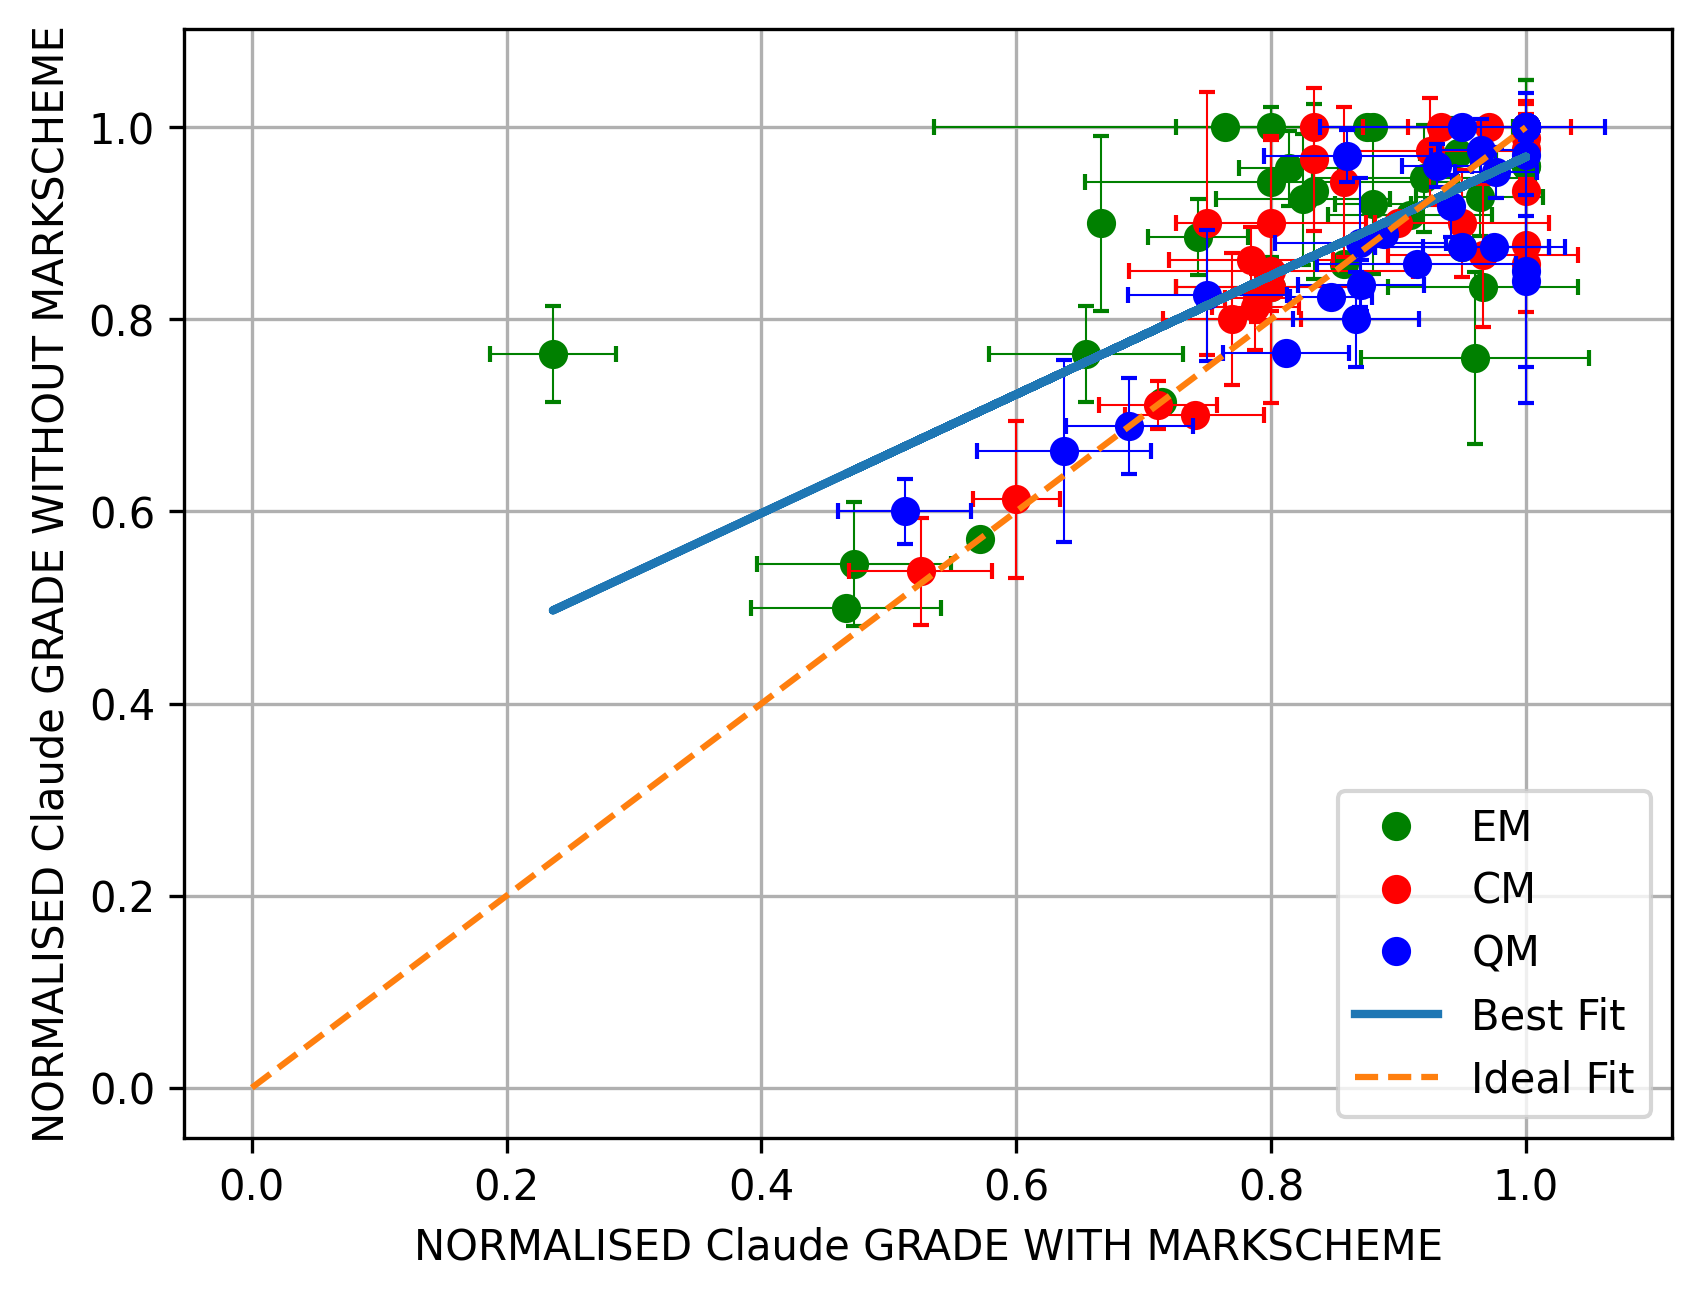

In [60]:
MS = [MS_EM, MS_CM, MS_QM]
NMS = [NMS_EM, NMS_CM, NMS_QM]
colr = ['green', 'red', 'blue']
names = ['EM', 'CM', 'QM']

# Concatenate data for trend line calculation
concat_MS = pd.concat(MS, ignore_index=True, axis=0)
concat_NMS = pd.concat(NMS, ignore_index=True, axis=0)

# Plot the different points
plt.figure()
for i, (dfi, dfj) in enumerate(zip(MS, NMS)):
    # Plot data and set labels
    plt.plot(dfi['Norm'], dfj['Norm'], 'o', color=colr[i], label=names[i])
    plt.errorbar(dfi['Norm'], dfj['Norm'], xerr=dfi['Norm Std'], yerr=dfj['Norm Std'], ls='none', elinewidth=0.5, capsize=2, color=colr[i])

# Labels
plt.xlabel('NORMALISED Claude GRADE WITH MARKSCHEME')
plt.ylabel('NORMALISED Claude GRADE WITHOUT MARKSCHEME')

# Fit the trend line
z = np.polyfit(concat_MS['Norm'], concat_NMS['Norm'], 1)
p = np.poly1d(z)
plt.plot(concat_MS['Norm'], p(concat_MS['Norm']), "-", linewidth=2, label="Best Fit")

# Ideal Fit line
plt.plot(np.linspace(0, 1, 2), np.linspace(0, 1, 2), '--', label="Ideal Fit")

# Show the plot
plt.legend()
plt.grid()
plt.savefig("Claude_MvNM.png")
plt.show()

In [64]:
scipy.stats.pearsonr(concat_MS['Norm'], concat_NMS['Norm']) #(pearson coefficient, p-value)

PearsonRResult(statistic=0.7631719064851543, pvalue=2.261904489771836e-18)

# Regression Markscheme vs Human Graded

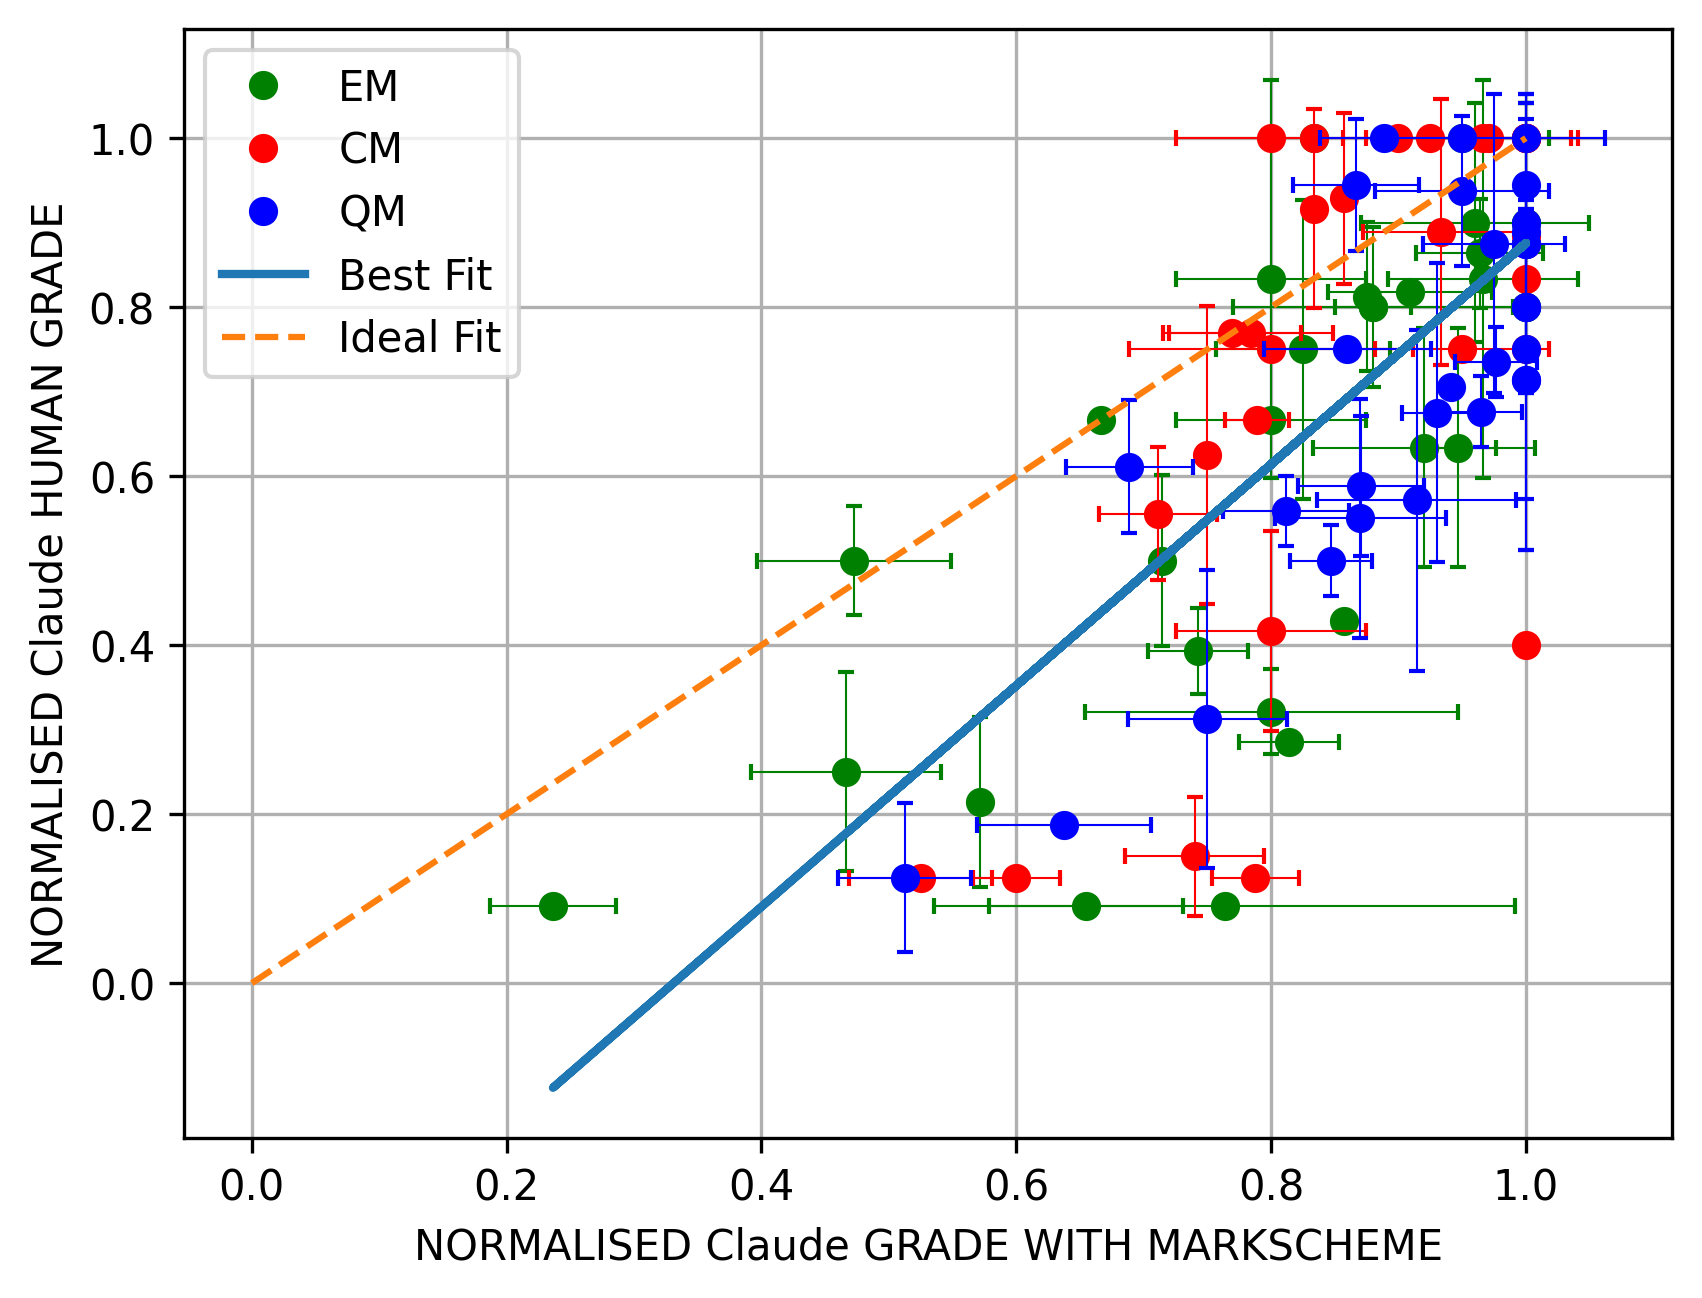

In [61]:
MS = [MS_EM, MS_CM, MS_QM]
HG = [HG_EM, HG_CM, HG_QM]
colr = ['green', 'red', 'blue']
names = ['EM', 'CM', 'QM']

# Concatenate data for trend line calculation
concat_MS = pd.concat(MS, ignore_index=True, axis=0)
concat_HG = pd.concat(HG, ignore_index=True, axis=0)

# Plot the different points
plt.figure()
for i, (dfi, dfj) in enumerate(zip(MS, HG)):
    # Plot data and set labels
    plt.plot(dfi['Norm'], dfj['Norm'], 'o', color=colr[i], label=names[i])
    plt.errorbar(dfi['Norm'], dfj['Norm'], xerr=dfi['Norm Std'], yerr=dfj['Norm Std'], ls='none', elinewidth=0.5, capsize=2, color=colr[i])

# Labels
plt.xlabel('NORMALISED Claude GRADE WITH MARKSCHEME')
plt.ylabel('NORMALISED Claude HUMAN GRADE')

# Fit the trend line
z = np.polyfit(concat_MS['Norm'], concat_HG['Norm'], 1)
p = np.poly1d(z)
plt.plot(concat_MS['Norm'], p(concat_MS['Norm']), "-", linewidth=2, label="Best Fit")

# Ideal Fit line
plt.plot(np.linspace(0, 1, 2), np.linspace(0, 1, 2), '--', label="Ideal Fit")

# Show the plot
plt.legend()
plt.grid()
plt.savefig("Claude_MvHG.png")
plt.show()

In [65]:
scipy.stats.pearsonr(concat_MS['Norm'], concat_HG['Norm']) #(pearson coefficient, p-value)

PearsonRResult(statistic=0.7216042392248657, pvalue=1.0281377700023672e-15)

# Regression No Markscheme vs Human Graded

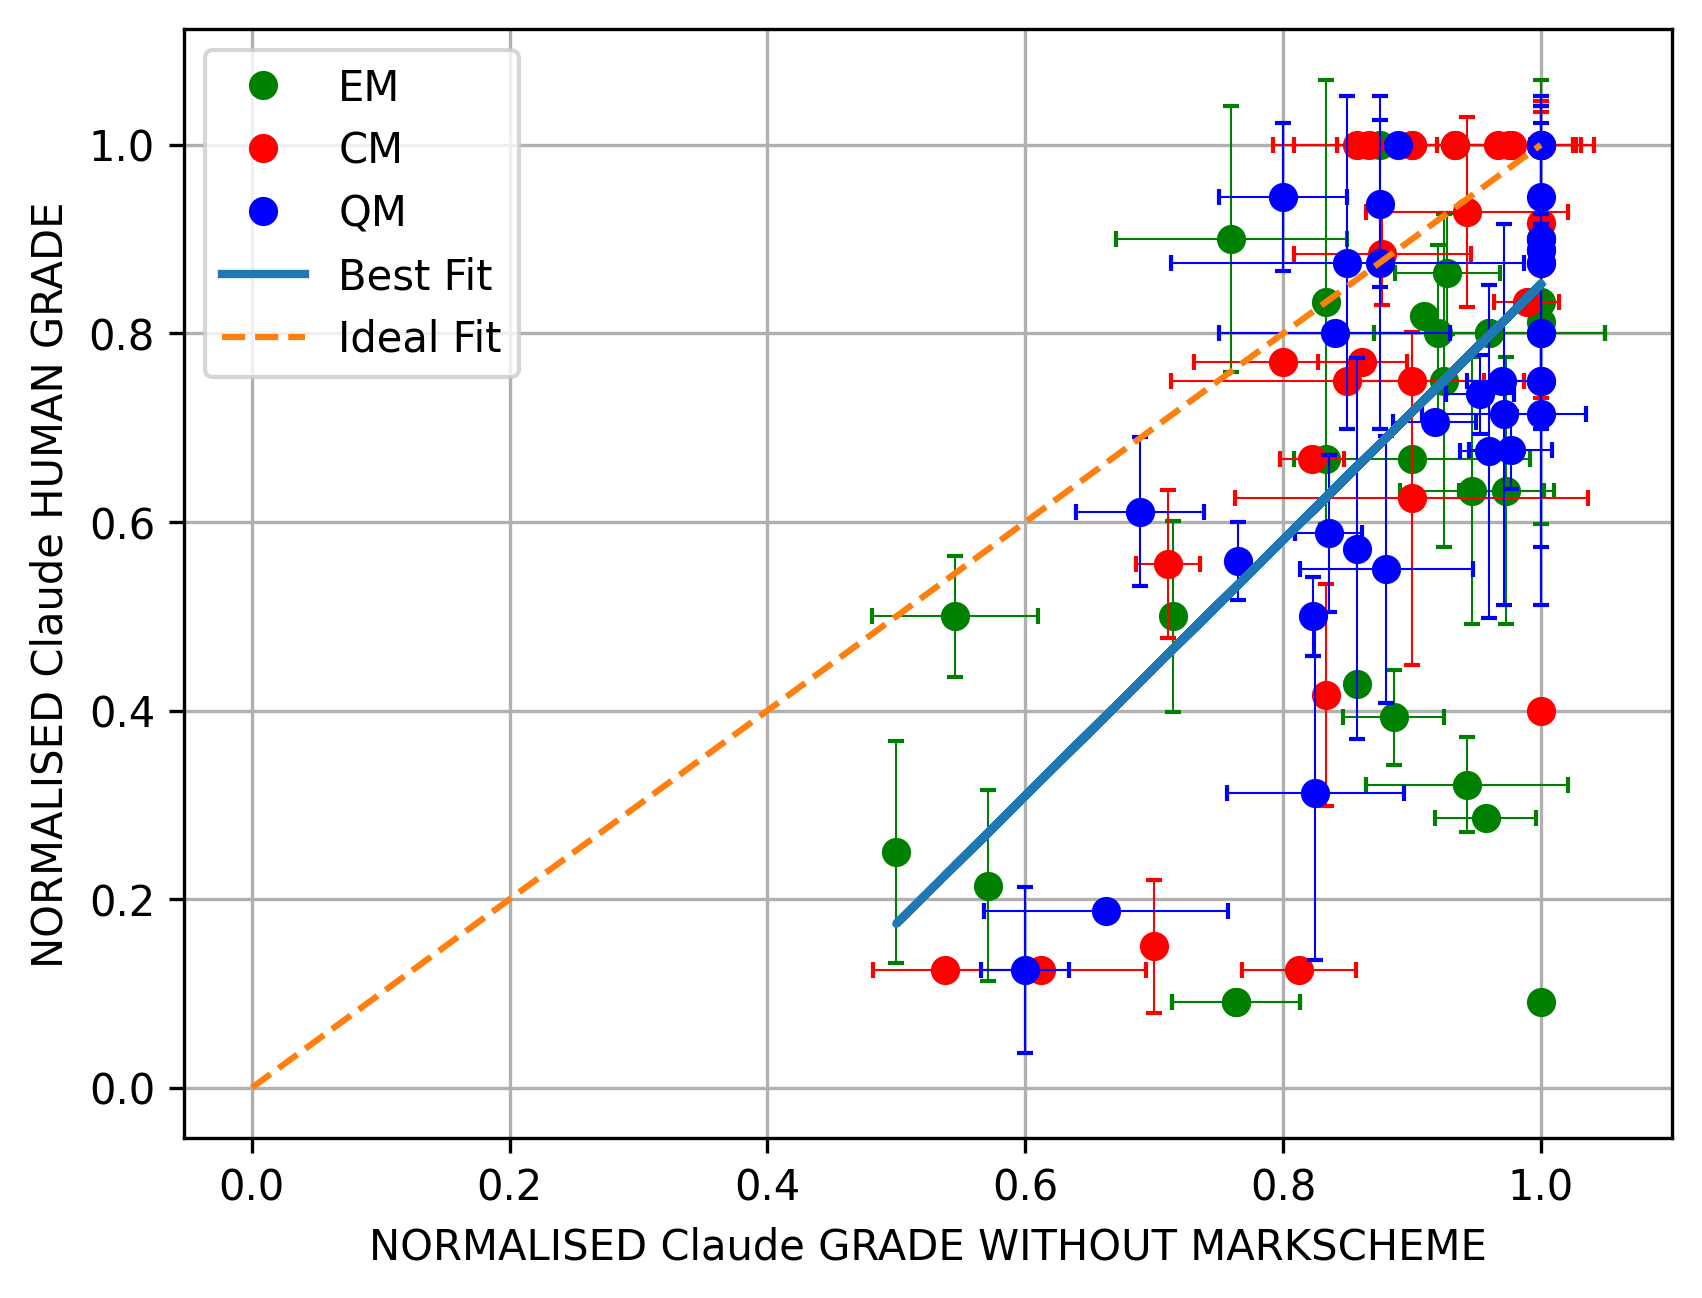

In [62]:
NMS = [NMS_EM, NMS_CM, NMS_QM]
HG = [HG_EM, HG_CM, HG_QM]
colr = ['green', 'red', 'blue']
names = ['EM', 'CM', 'QM']

# Concatenate data for trend line calculation
concat_NMS = pd.concat(NMS, ignore_index=True, axis=0)
concat_HG = pd.concat(HG, ignore_index=True, axis=0)

# Plot the different points
plt.figure()
for i, (dfi, dfj) in enumerate(zip(NMS, HG)):
    # Plot data and set labels
    plt.plot(dfi['Norm'], dfj['Norm'], 'o', color=colr[i], label=names[i])
    plt.errorbar(dfi['Norm'], dfj['Norm'], xerr=dfi['Norm Std'], yerr=dfj['Norm Std'], ls='none', elinewidth=0.5, capsize=2, color=colr[i])

# Labels
plt.xlabel('NORMALISED Claude GRADE WITHOUT MARKSCHEME')
plt.ylabel('NORMALISED Claude HUMAN GRADE')

# Fit the trend line
z = np.polyfit(concat_NMS['Norm'], concat_HG['Norm'], 1)
p = np.poly1d(z)
plt.plot(concat_NMS['Norm'], p(concat_NMS['Norm']), "-", linewidth=2, label="Best Fit")

# Ideal Fit line
plt.plot(np.linspace(0, 1, 2), np.linspace(0, 1, 2), '--', label="Ideal Fit")

# Show the plot
plt.legend()
plt.grid()
plt.savefig("Claude_NMvHG.png")
plt.show()

In [66]:
scipy.stats.pearsonr(concat_NMS['Norm'], concat_HG['Norm']) #(pearson coefficient, p-value)

PearsonRResult(statistic=0.6058217039360171, pvalue=2.5079357664302324e-10)

# Clustering Markscheme vs No Markscheme

In [74]:
clust_data_1 = list(zip(concat_MS['Norm'], concat_NMS['Norm']))

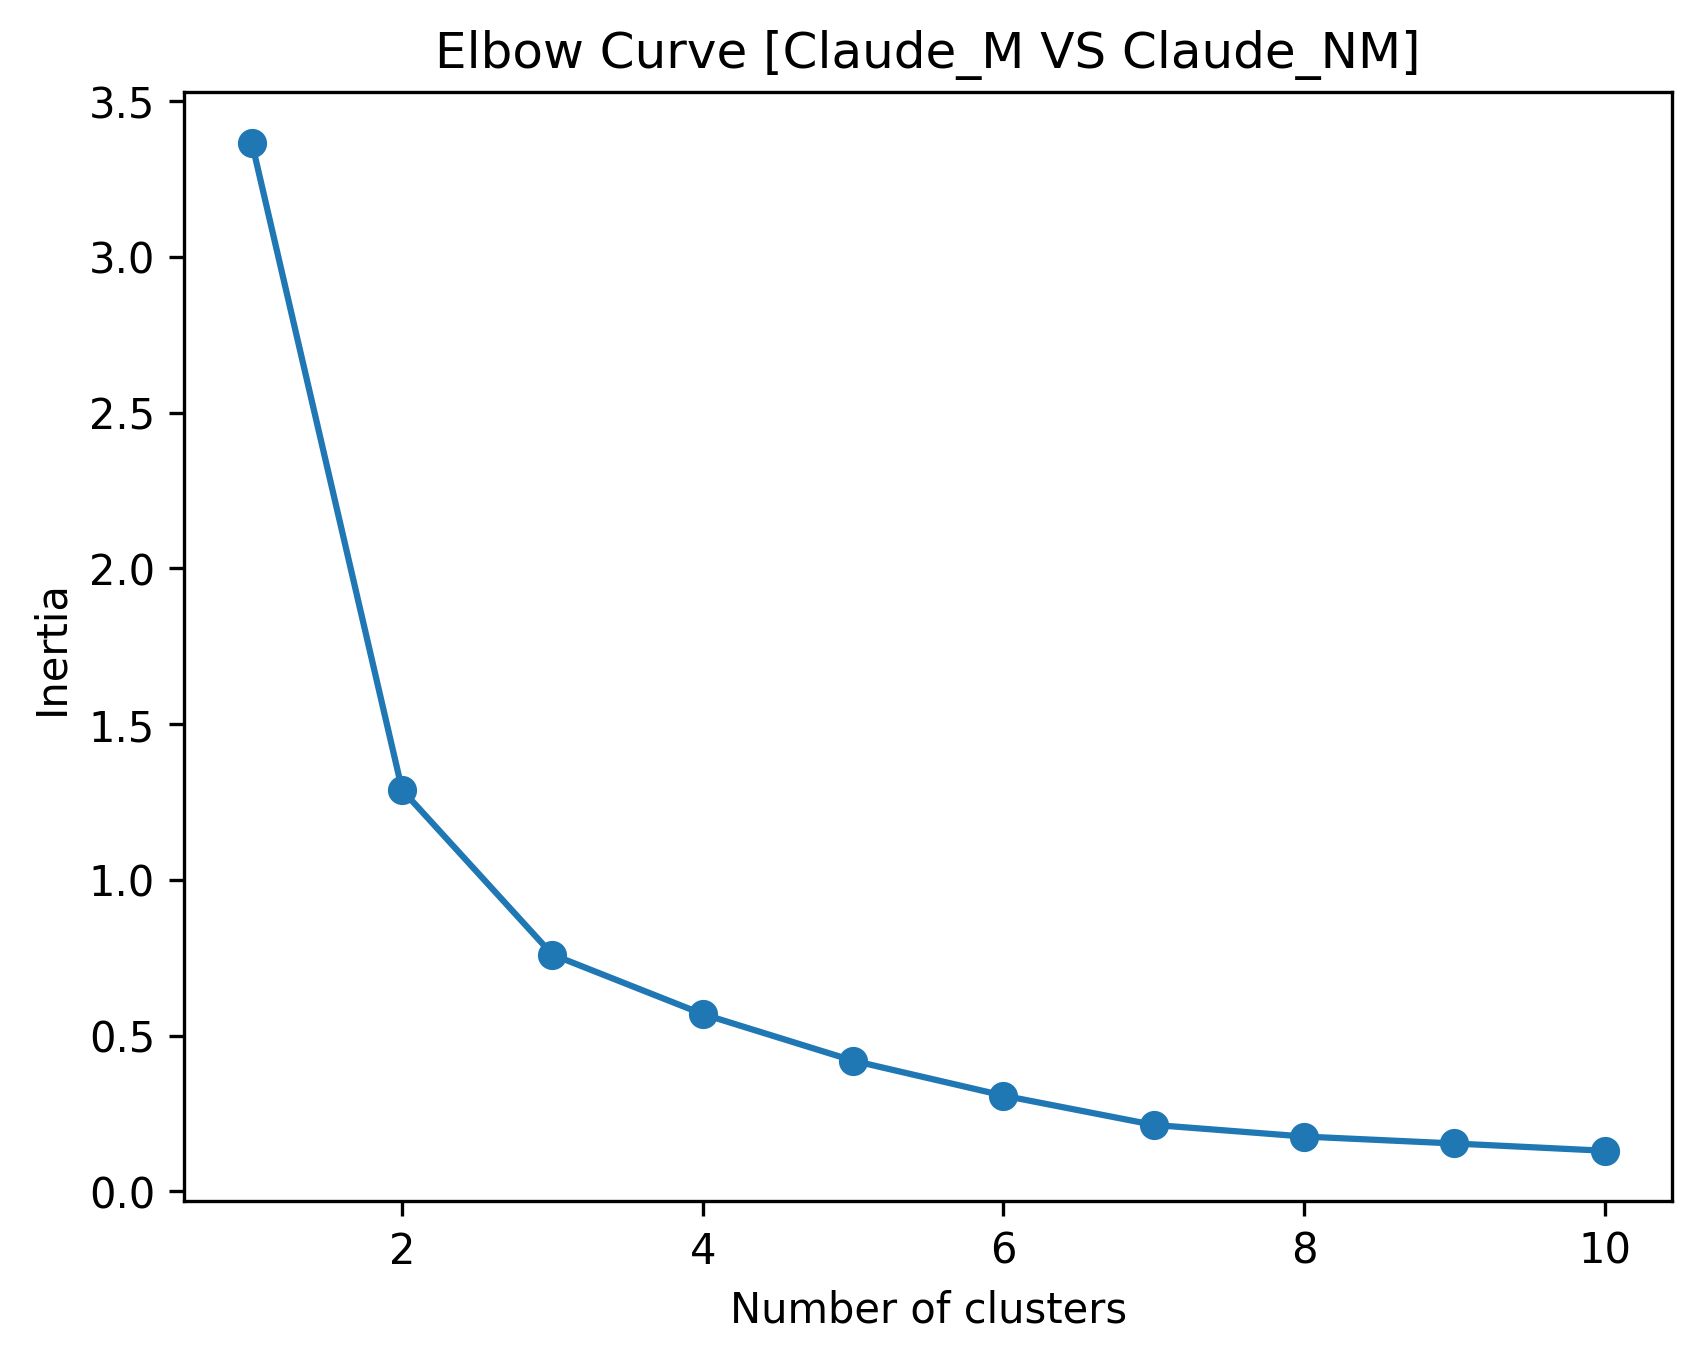

In [75]:
#Array for variation within each cluster
inertias = []

#We will calculate the variation for 10 clusters
for i in range(1,11): 
    kmeans = KMeans(n_clusters=i, n_init = 10)
    kmeans.fit(clust_data_1)
    inertias.append(kmeans.inertia_)

#plotting elbow curve    
plt.plot(range(1,11), inertias, marker='o')
plt.title('Elbow Curve [Claude_M VS Claude_NM]')
plt.xlabel('Number of clusters')
plt.ylabel('Inertia')
plt.show()

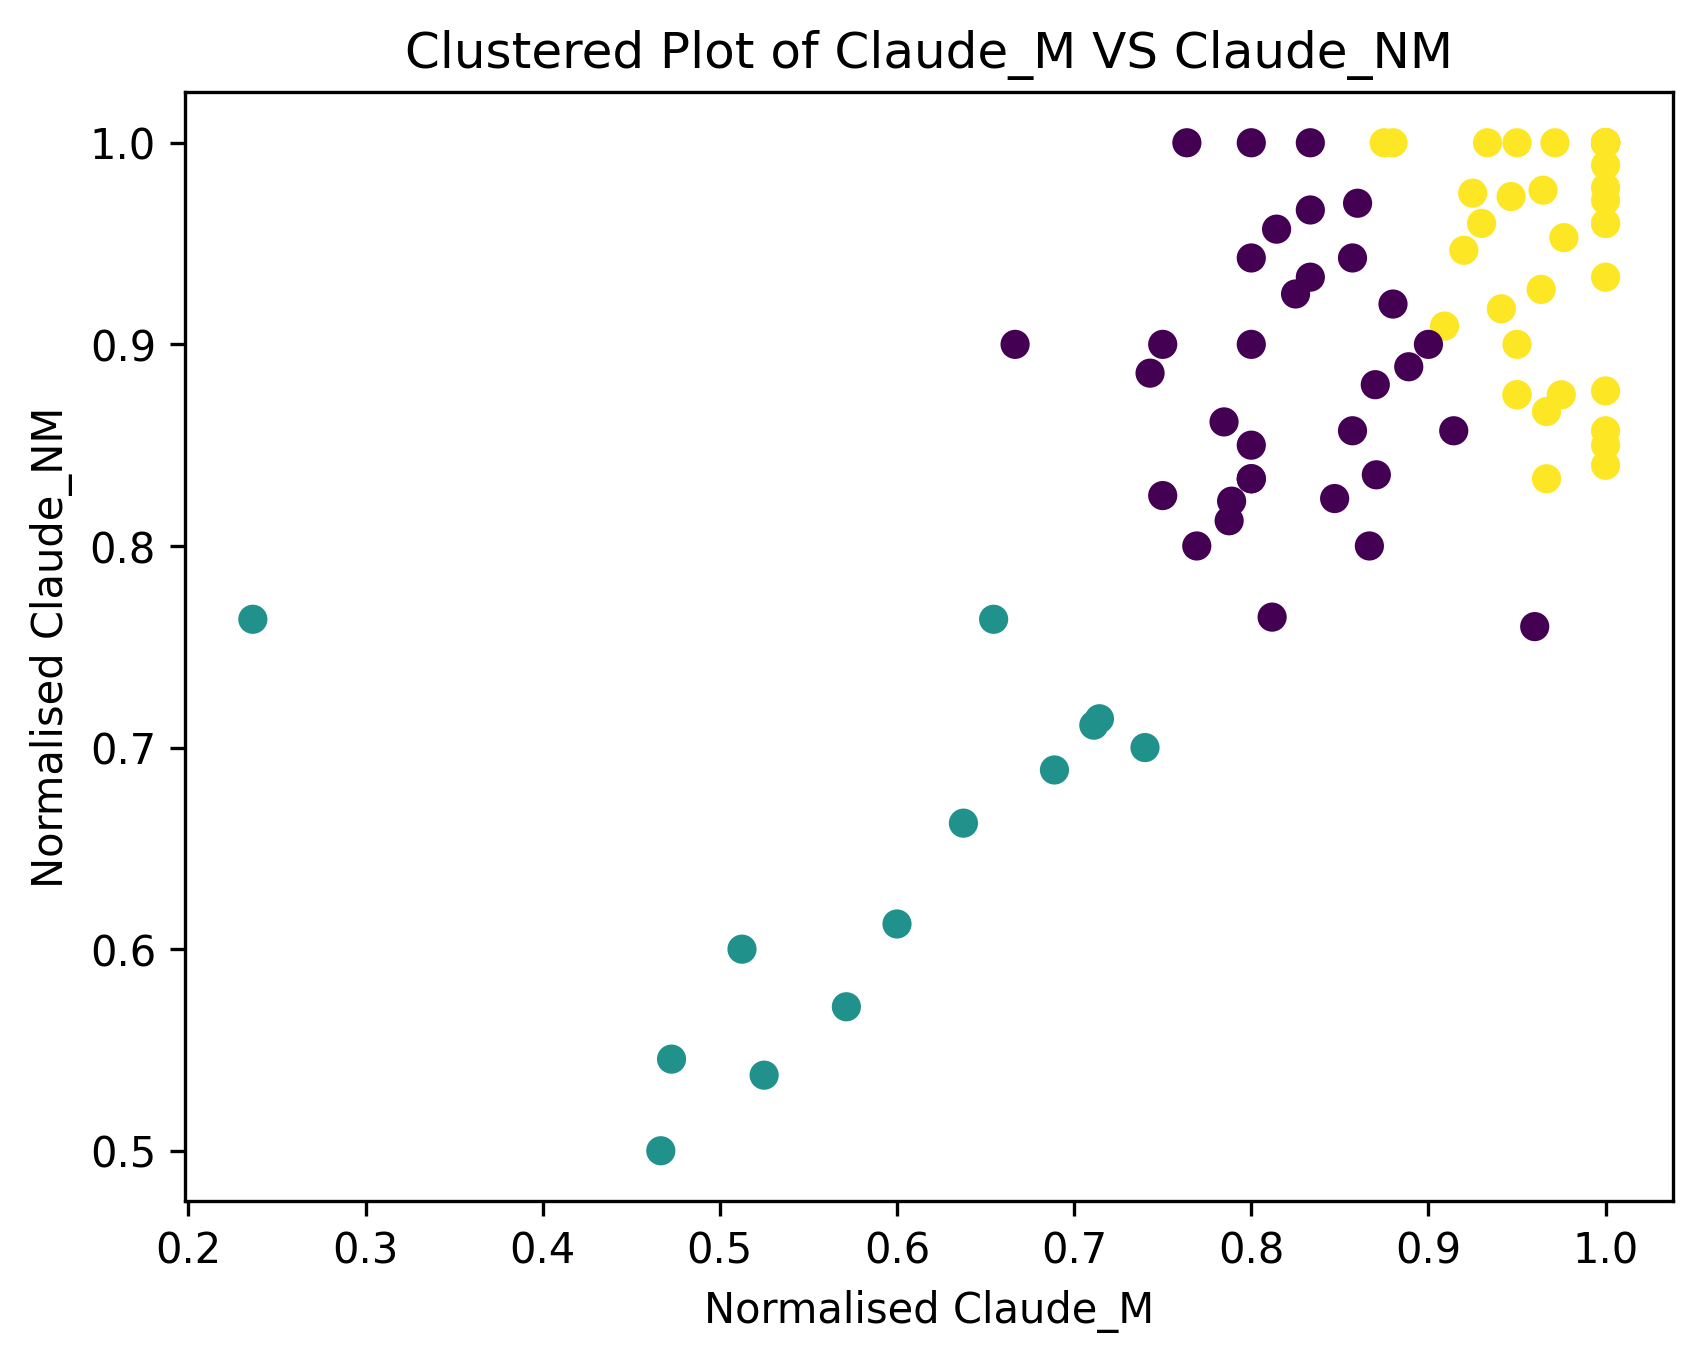

In [76]:
#Creating the classified data. Play around with n_clusters if you would like to see how data is classfied differently.
kmeans = KMeans(n_clusters=3, n_init = 10)
kmeans.fit(clust_data_1)

#Plotting classified data
plt.scatter(concat_MS['Norm'], concat_NMS['Norm'], c=kmeans.labels_)
plt.xlabel("Normalised Claude_M")
plt.ylabel("Normalised Claude_NM")
plt.title("Clustered Plot of Claude_M VS Claude_NM")
plt.show()

# Clustering Markscheme vs Human Grading

In [77]:
clust_data_2 = list(zip(concat_MS['Norm'], concat_HG['Norm']))

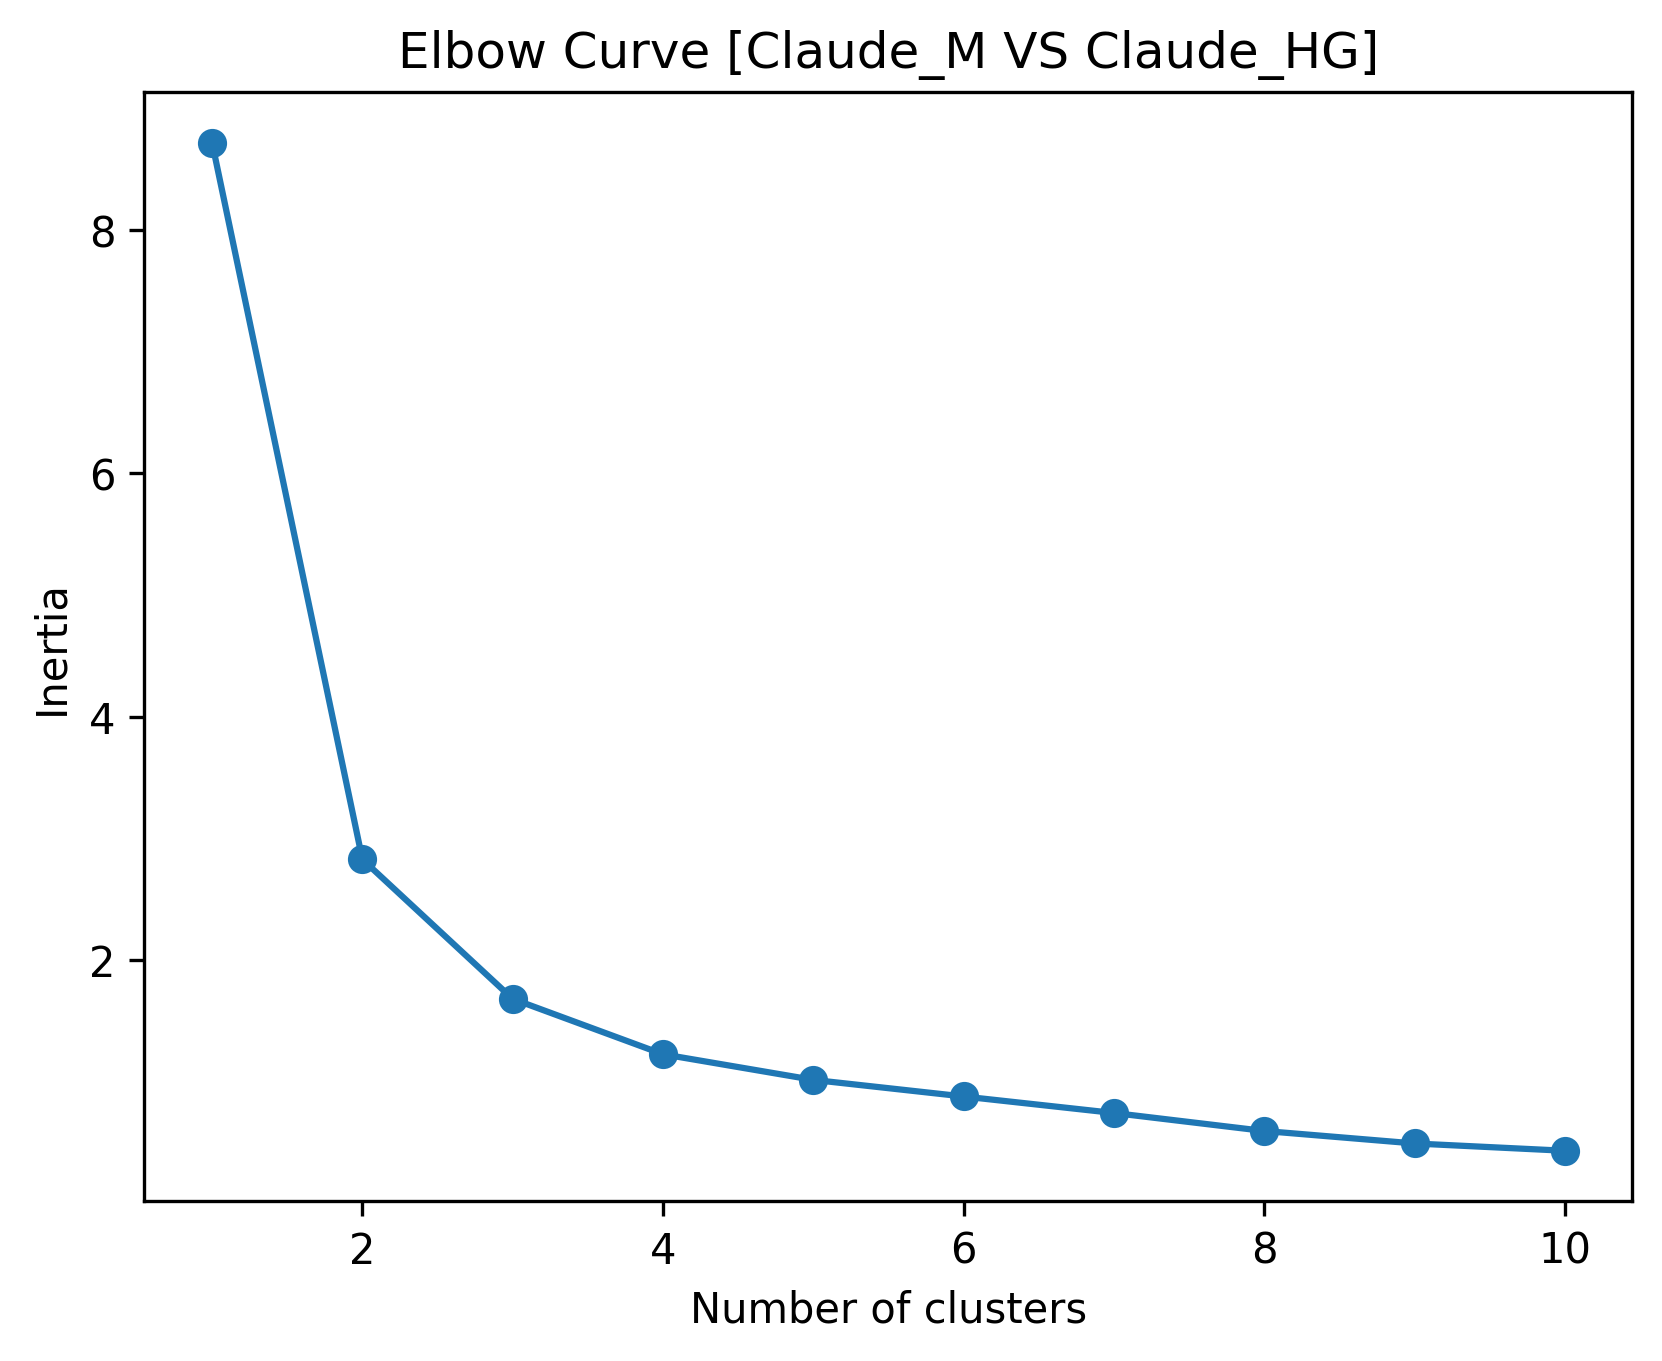

In [78]:
#Array for variation within each cluster
inertias = []

#We will calculate the variation for 10 clusters
for i in range(1,11): 
    kmeans = KMeans(n_clusters=i, n_init = 10)
    kmeans.fit(clust_data_2)
    inertias.append(kmeans.inertia_)

#plotting elbow curve    
plt.plot(range(1,11), inertias, marker='o')
plt.title('Elbow Curve [Claude_M VS Claude_HG]')
plt.xlabel('Number of clusters')
plt.ylabel('Inertia')
plt.show()

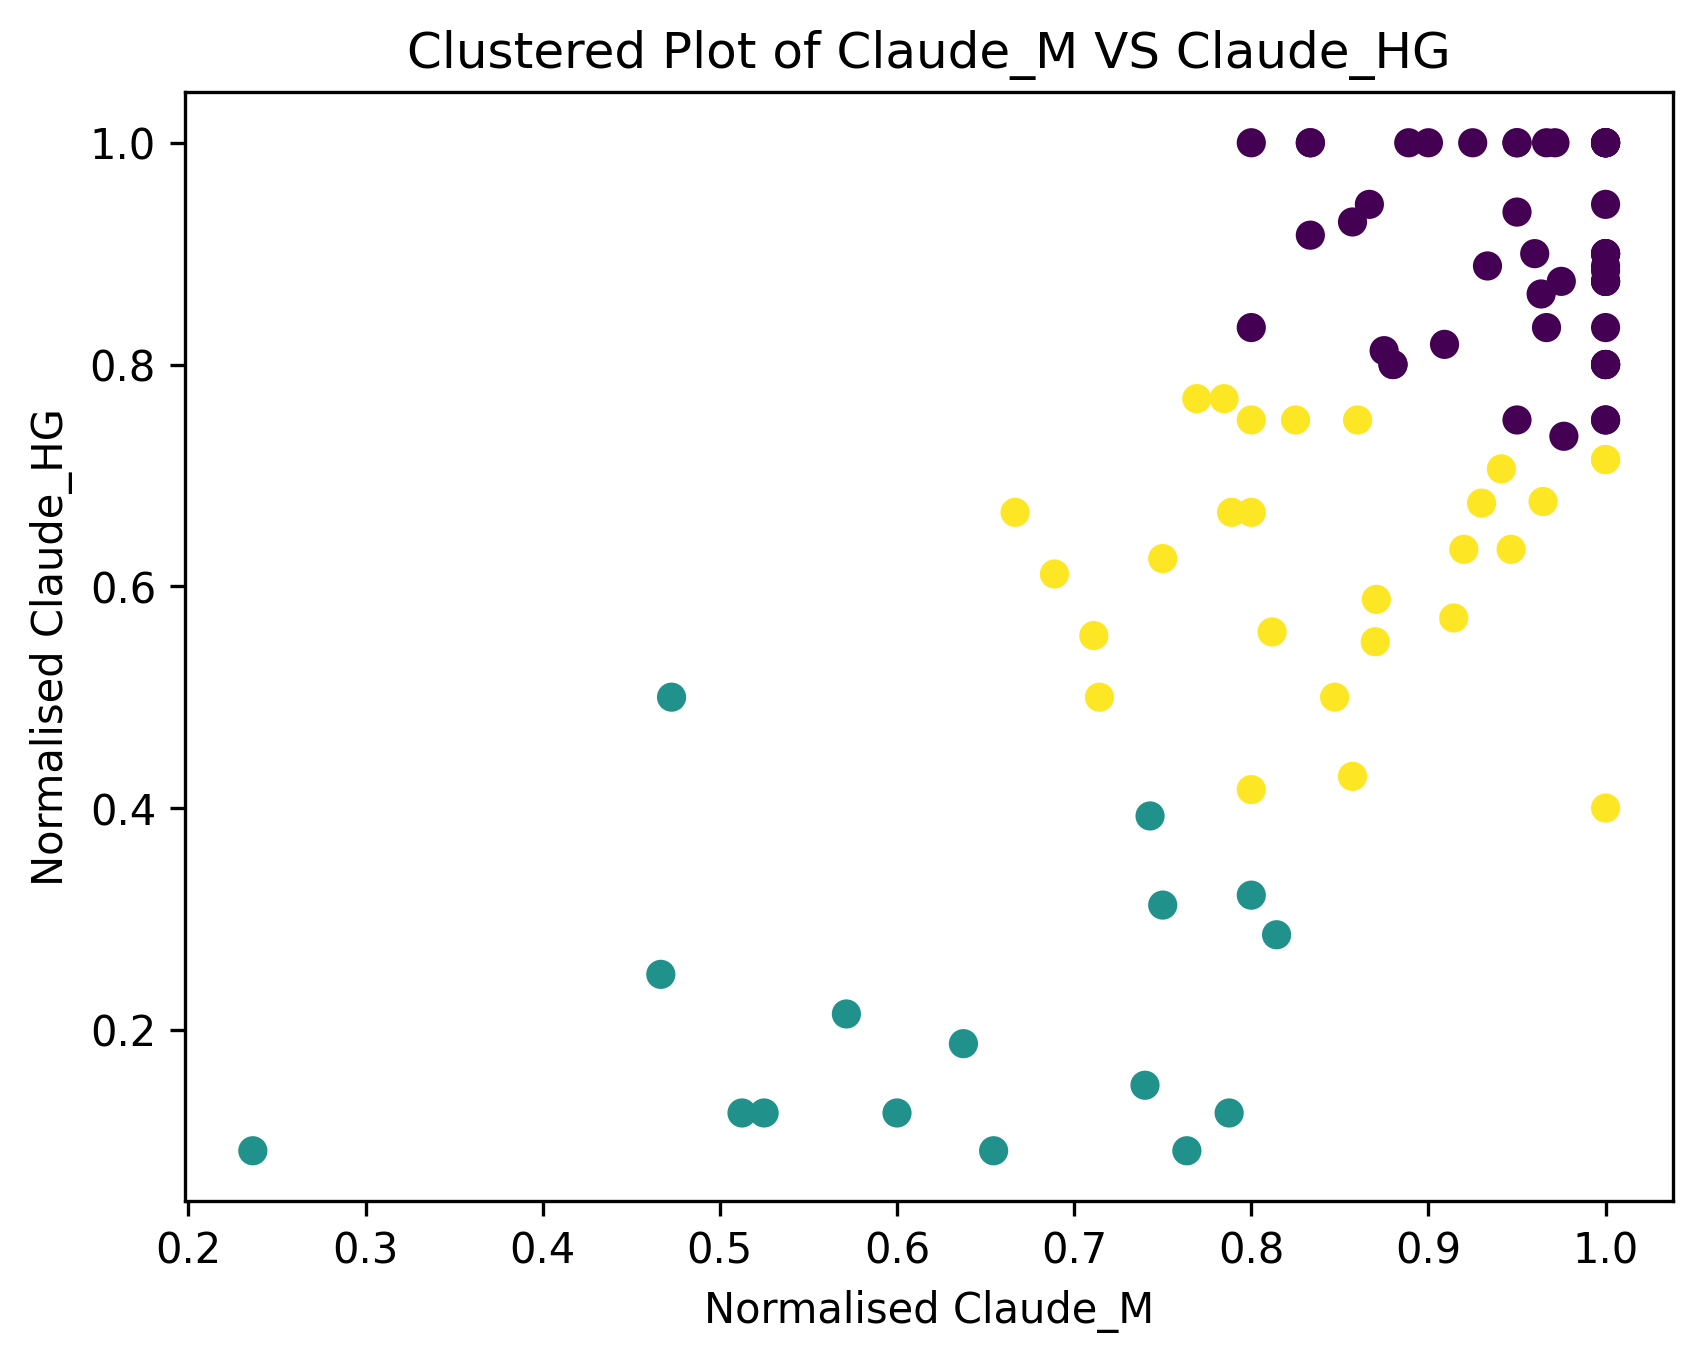

In [79]:
#Creating the classified data. Play around with n_clusters if you would like to see how data is classfied differently.
kmeans = KMeans(n_clusters=3, n_init = 10)
kmeans.fit(clust_data_2)

#Plotting classified data
plt.scatter(concat_MS['Norm'], concat_HG['Norm'], c=kmeans.labels_)
plt.xlabel("Normalised Claude_M")
plt.ylabel("Normalised Claude_HG")
plt.title("Clustered Plot of Claude_M VS Claude_HG")
plt.show()

# Clustering No Markscheme vs Human Grading

In [80]:
clust_data_3 = list(zip(concat_NMS['Norm'], concat_HG['Norm']))

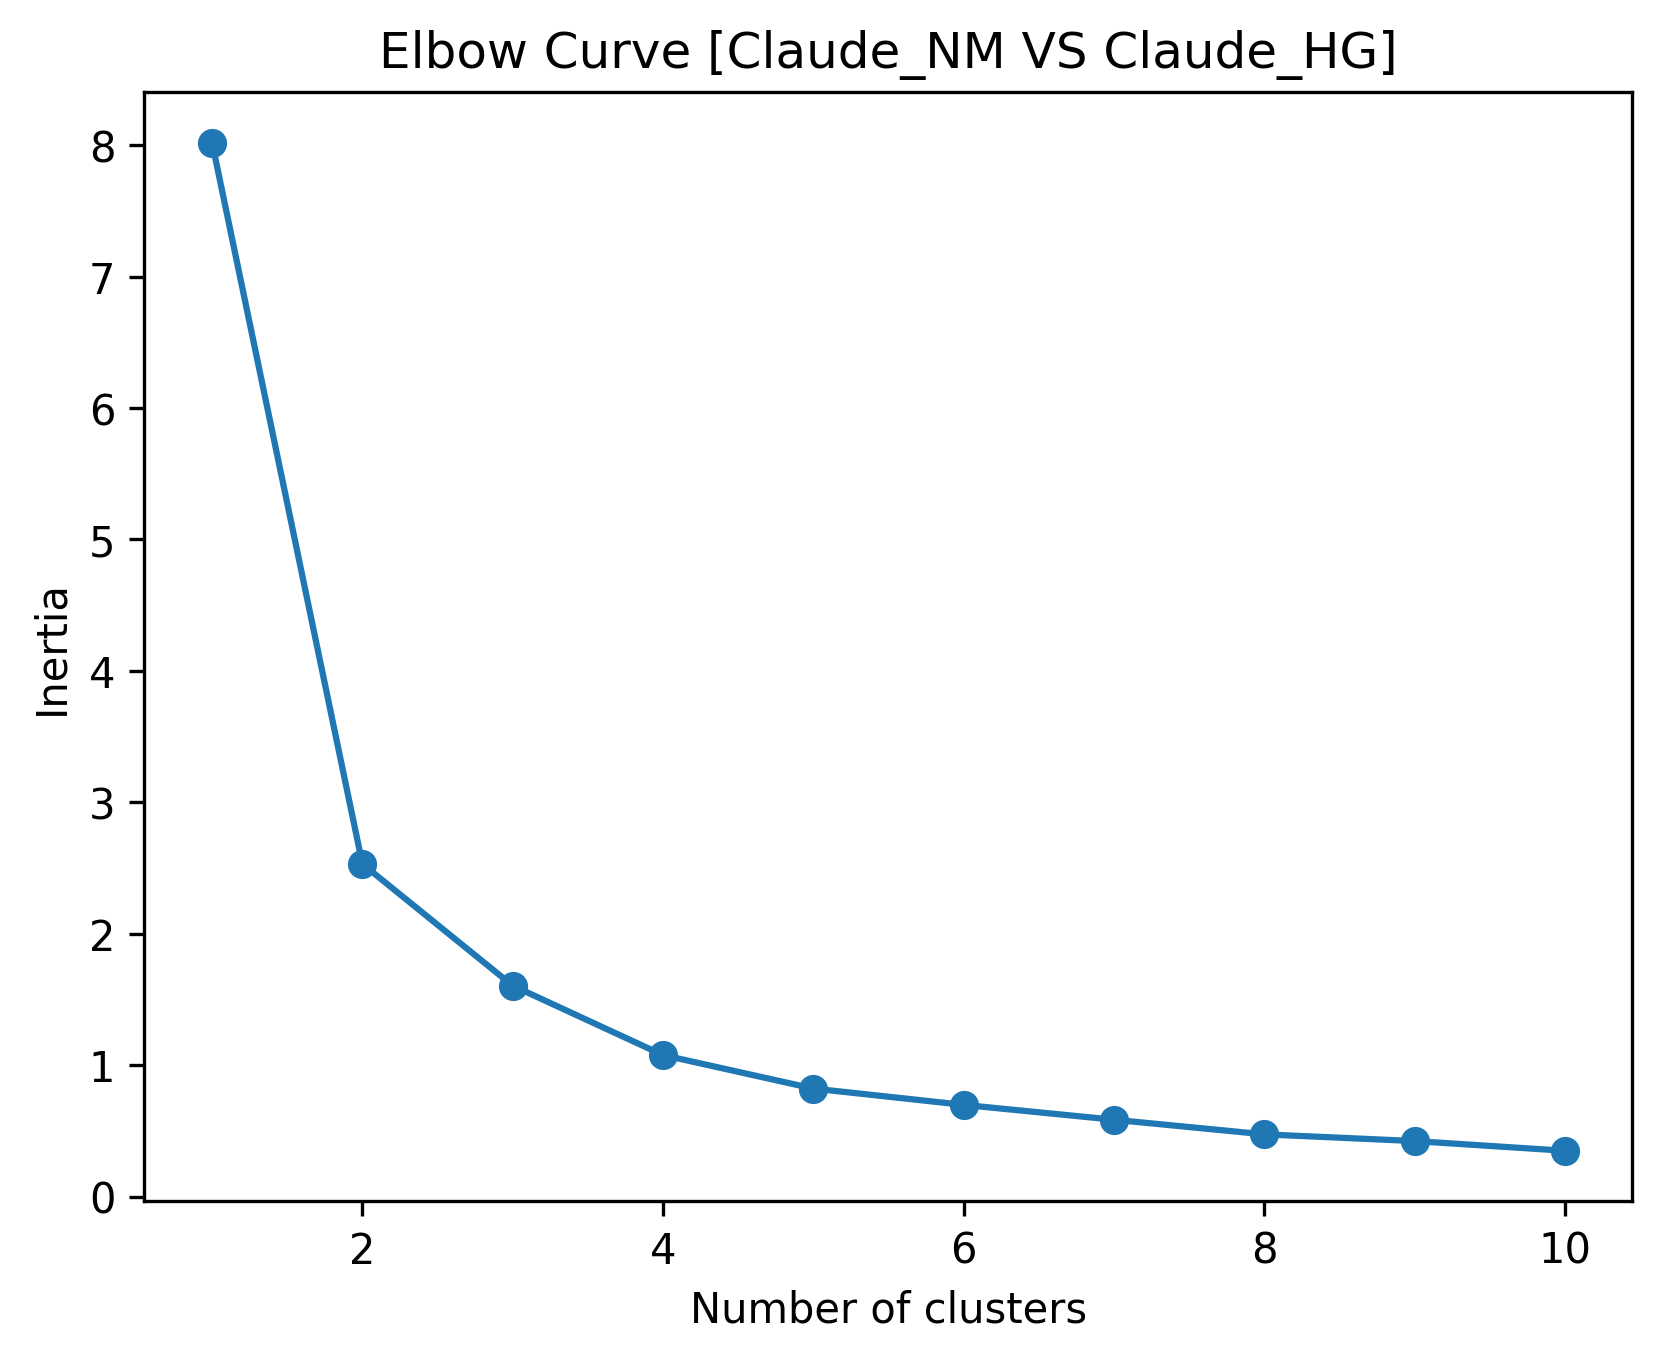

In [81]:
#Array for variation within each cluster
inertias = []

#We will calculate the variation for 10 clusters
for i in range(1,11): 
    kmeans = KMeans(n_clusters=i, n_init = 10)
    kmeans.fit(clust_data_3)
    inertias.append(kmeans.inertia_)

#plotting elbow curve    
plt.plot(range(1,11), inertias, marker='o')
plt.title('Elbow Curve [Claude_NM VS Claude_HG]')
plt.xlabel('Number of clusters')
plt.ylabel('Inertia')
plt.show()

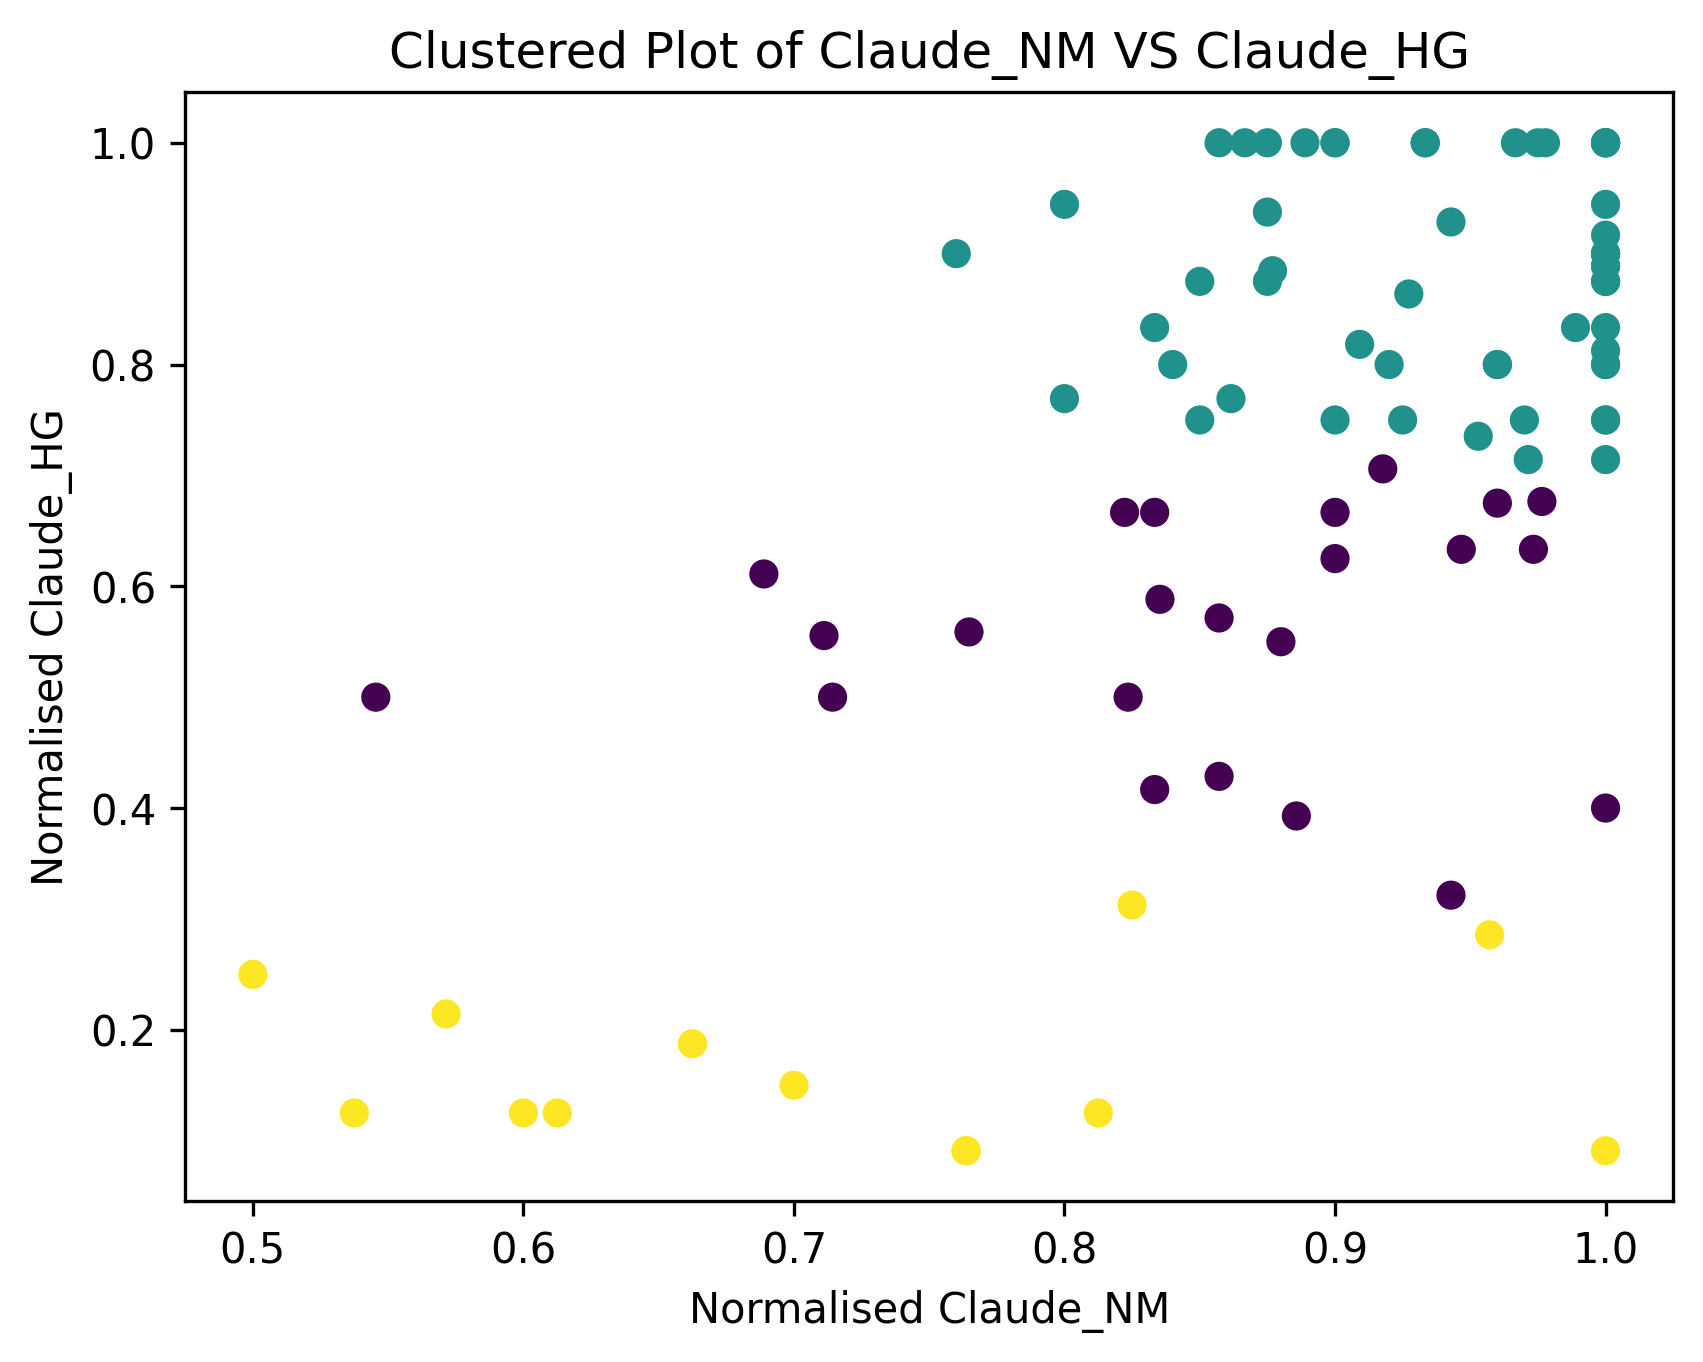

In [82]:
#Creating the classified data. Play around with n_clusters if you would like to see how data is classfied differently.
kmeans = KMeans(n_clusters=3, n_init = 10)
kmeans.fit(clust_data_3)

#Plotting classified data
plt.scatter(concat_NMS['Norm'], concat_HG['Norm'], c=kmeans.labels_)
plt.xlabel("Normalised Claude_NM")
plt.ylabel("Normalised Claude_HG")
plt.title("Clustered Plot of Claude_NM VS Claude_HG")
plt.show()

# Implementing t-SNE


In [ ]:
red_data = pd.concat([]) #creating data with only normalised grades
